In [26]:
import pandas as pd 
import xlwings as xl 
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

# get this workbook
wb = xl.Book(r'data.xlsx')

# make a pandas dataframe with data
dataSheet = wb.sheets['data']
plotSheet = wb.sheets['graph']

# transforming data in pandas dataframe
data_range_str = dataSheet.used_range.get_address(row_absolute=False, column_absolute=False)
data_range = dataSheet.range(data_range_str).value

dt = pd.DataFrame(data_range[1:], columns=data_range[0])
dt.head()

,SITE,COUNTRY,PRODUCT,PAGE,DROP-OFF RATE,UNIQUE USER,INVOICE
0,LD,US,RSLSE,PREVIEW,0.540807,19578.0,10587.925405
1,LD,US,RSLSE,PAYMENT,0.805340,12465.0,10038.567332
2,LD,US,RSLSE,SELECTION,0.887048,11641.0,10326.123479
3,LD,US,PWRATT,PREVIEW,0.491351,66245.0,32549.531004
4,LD,US,PWRATT,PAYMENT,0.739526,70625.0,52228.988576


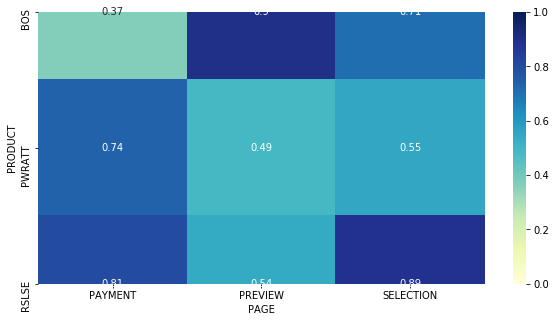

In [29]:
#filtering data
site_param = plotSheet.range('B1').value
country_param = plotSheet.range('B2').value

heat = dt[(dt.SITE == site_param) & (dt.COUNTRY == country_param)]
heat_piv = heat.pivot_table(index=['PRODUCT'], values='DROP-OFF RATE', columns='PAGE')
heat_piv= heat_piv.fillna(0)#.sort_values('INVOICE', ascending=False)
#heat_piv = heat_piv.reset_index()#.drop('PAGE', axis=1)#('INVOICE').drop('INVOICE', axis=1)
heat_piv.head()

#ploting graph
sns.heatmap(heat_piv, annot=True, cmap="YlGnBu", vmin=0, vmax=1)